# Classification and Regression Trees


In [2]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.model_selection import train_test_split, GridSearchCV

import missingno as msno

import matplotlib.pylab as plt

from dmba import plotDecisionTree, classificationSummary, regressionSummary

no display found. Using non-interactive Agg backend


In [3]:
# NOTE: this line of code is only required for Windows computers with local resources (I'll delete before upload)
# NOTE: use double backslash for directory
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Users\\dgugg\\Anaconda3\\Library\\bin\\graphviz'

#### The Home Loan dataset allows us to predict who will have their loans approved.

In [4]:
data_df = pd.read_csv('Loan_data.csv')

In [5]:
data_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data_df.drop('Loan_ID', axis=1, inplace=True)
data_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [86]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [9]:
X = data_df.drop('Loan_Status', axis=1)

y = data_df['Loan_Status']

In [10]:
y.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [11]:
X = pd.get_dummies(X, drop_first=False)

In [12]:
X.shape

(614, 20)

In [13]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()

X_imp = imputer.fit_transform(X)

X_imp = pd.DataFrame(X_imp, columns=X.columns)

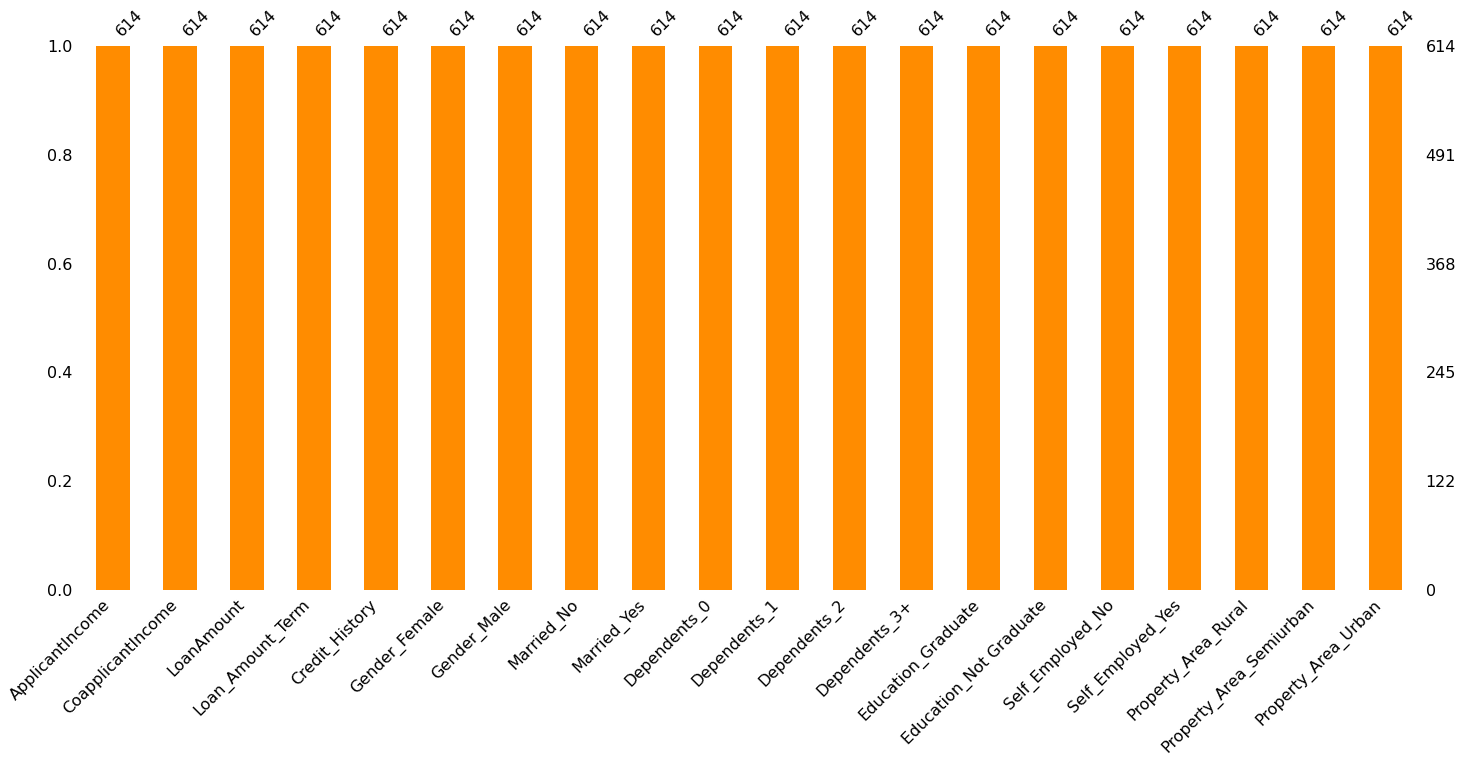

In [16]:
%matplotlib inline

msno.bar(X_imp, color="darkorange")

#### The fit function accepts the X objects (predictors) first followed by the response variable. Notice how they created both the X and y objects within the fit function itself.

In [53]:
classTree = DecisionTreeClassifier(random_state=1, max_depth=3)

classTree.fit(X_imp, y)

DecisionTreeClassifier(max_depth=3, random_state=1)

#### The first line of code prints the classes of the response variable. The second line generates a plot of the decision tree structure. Note how feature names and class names are required to create this diagram.

Classes: N, Y


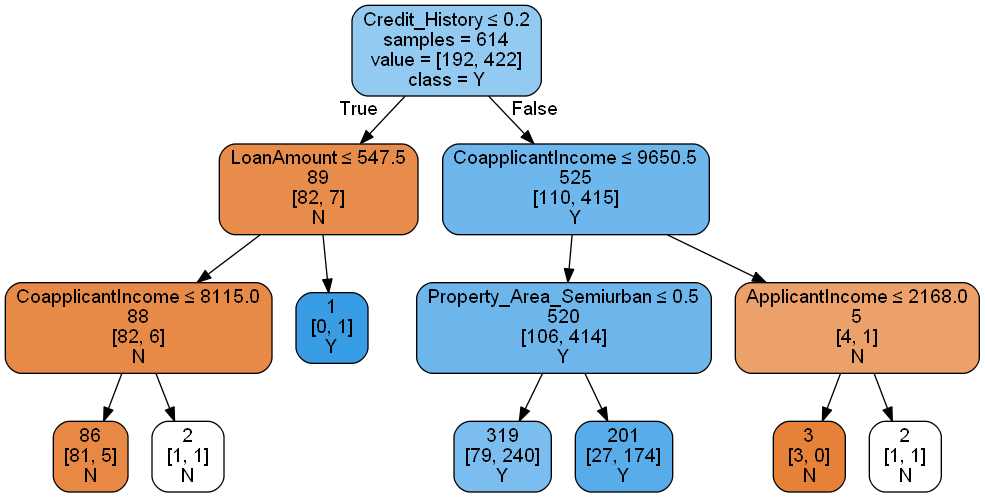

In [55]:
print("Classes: {}".format(', '.join(classTree.classes_)))

plotDecisionTree(classTree, feature_names=X.columns,class_names=classTree.classes_)

The order of the `values` vector in the boxes is the same as `classTree.classes_`.

## Figure 9.8
Grow tree fully by removing the Depth=3 parameter; this will allow the tree to overfit by seeking perfect classification. It also shows how a complex tree can be difficult to interpret.

Classes: N, Y


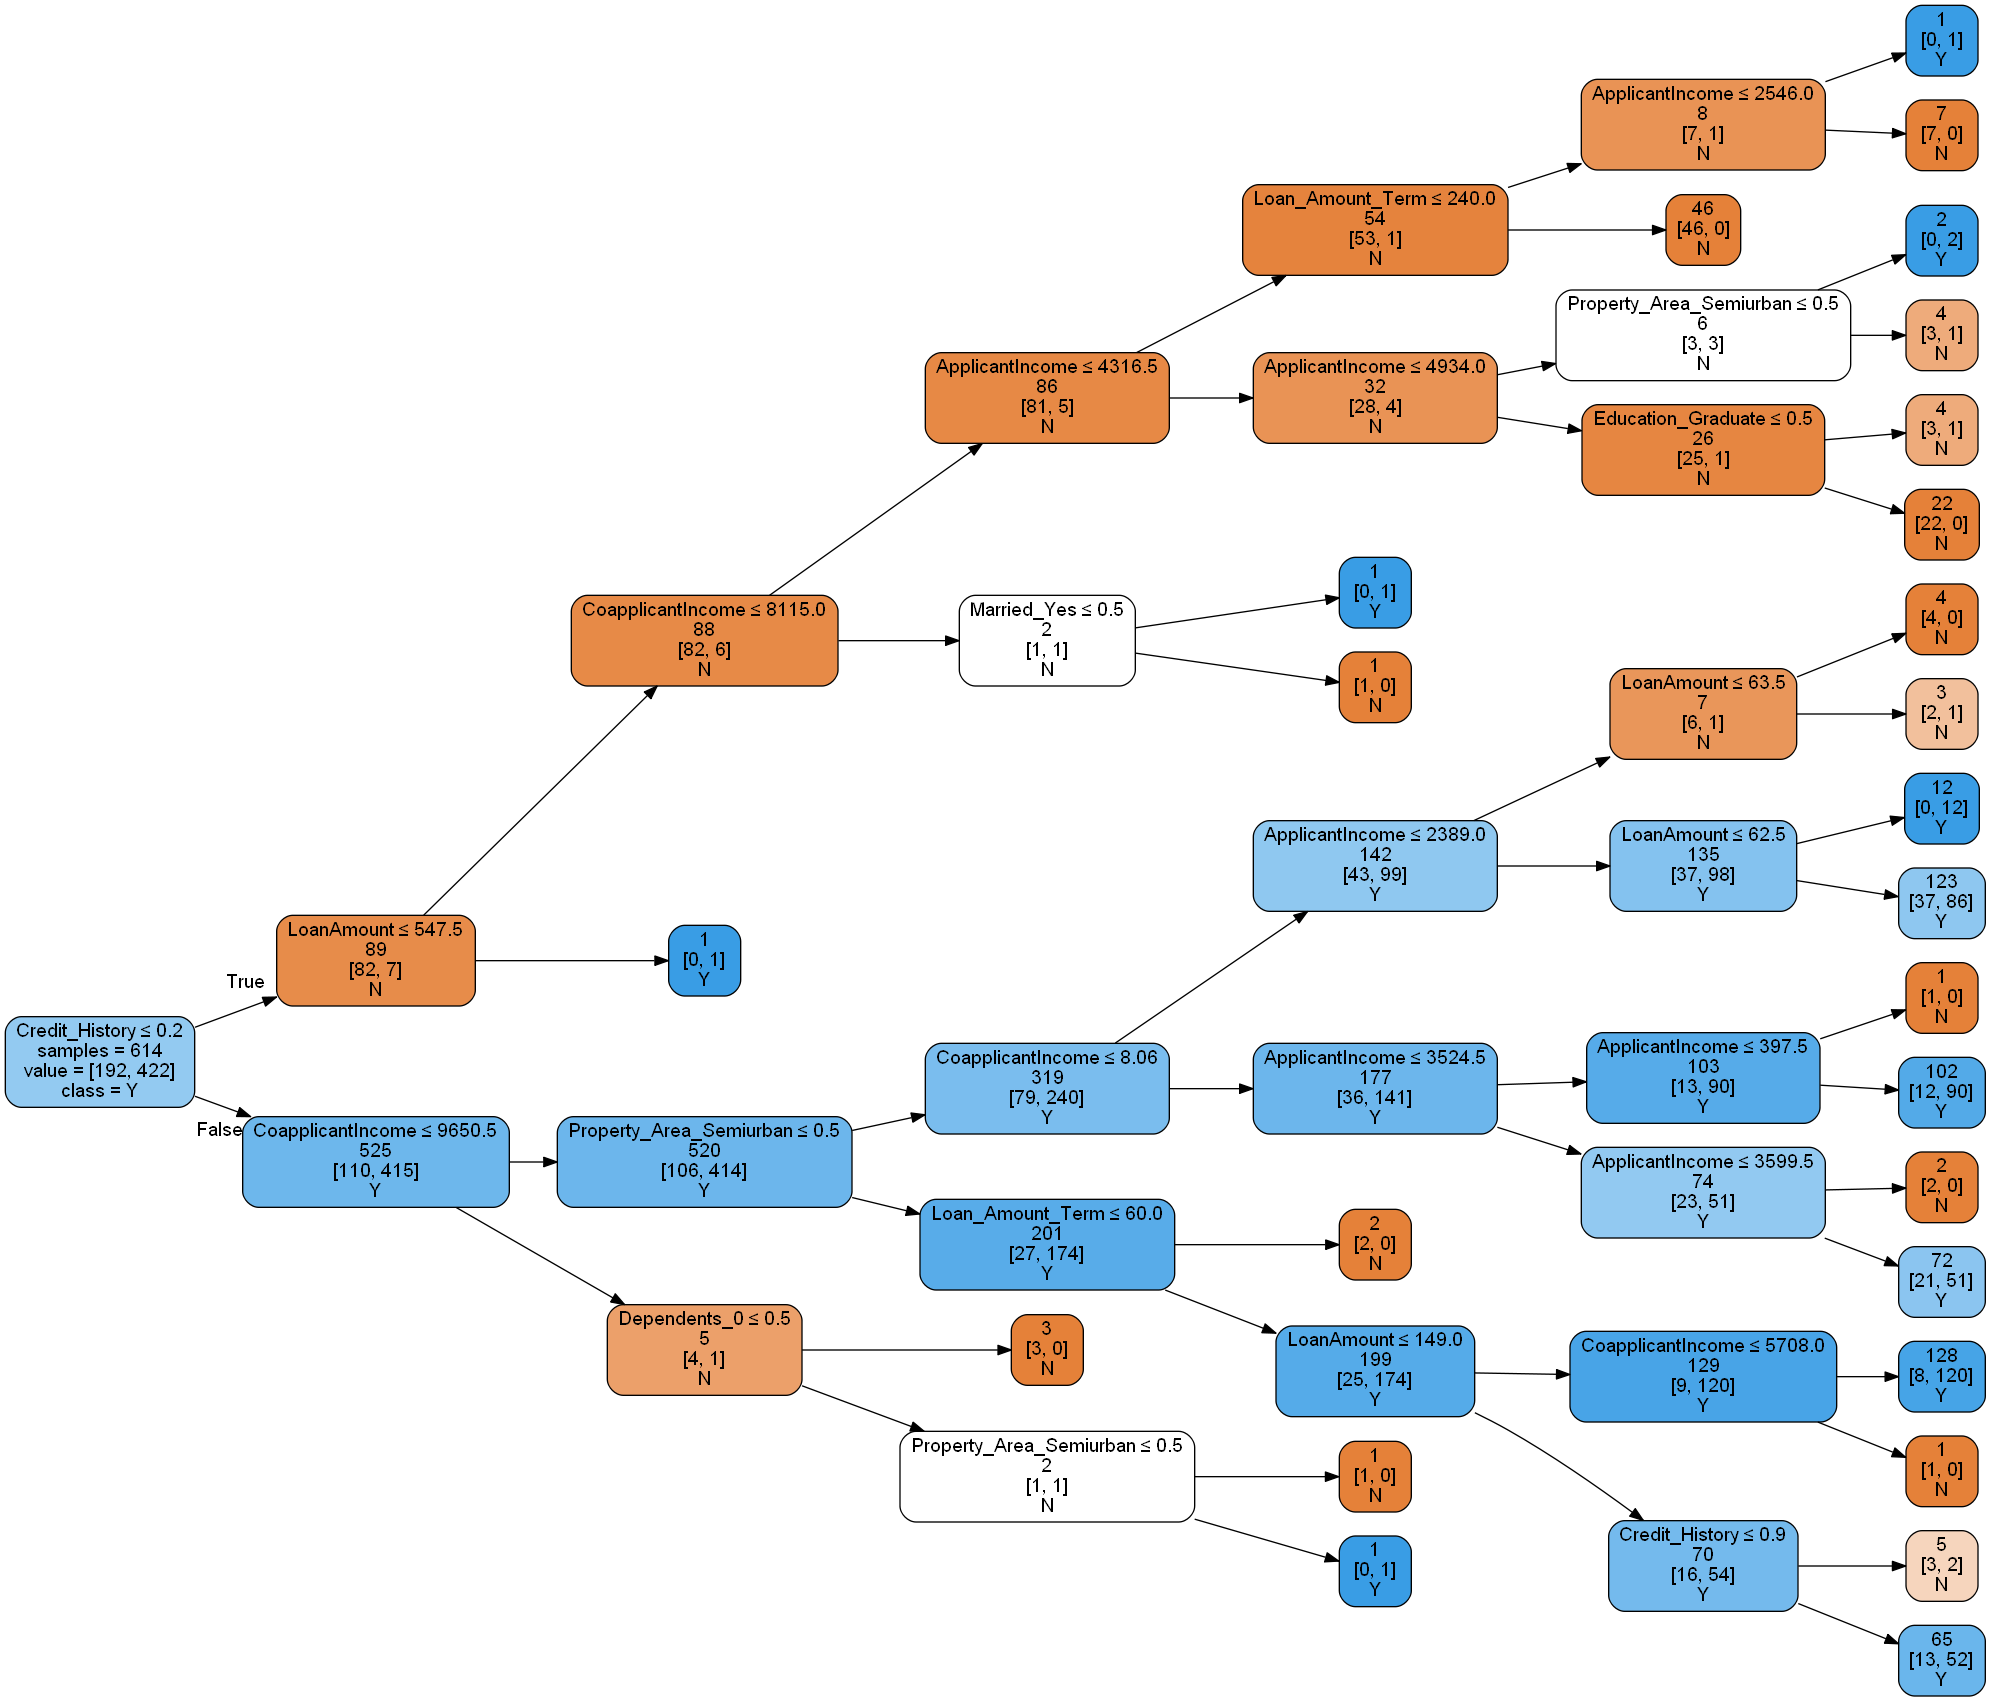

In [17]:
classTree = DecisionTreeClassifier(max_depth=6, random_state=1)

classTree.fit(X_imp, y)

print("Classes: {}".format(', '.join(classTree.classes_)))

plotDecisionTree(classTree, feature_names=X.columns, class_names=classTree.classes_, rotate=True)

#### Create a train/test split and check model performance

In [57]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.5, stratify=y, random_state=1)

In [58]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()

train_X = imputer.fit_transform(train_X)
test_X = imputer.transform(test_X)

train_X = pd.DataFrame(train_X, columns=X.columns)

#### There is no depth parameter, so this tree will overfit the training data.

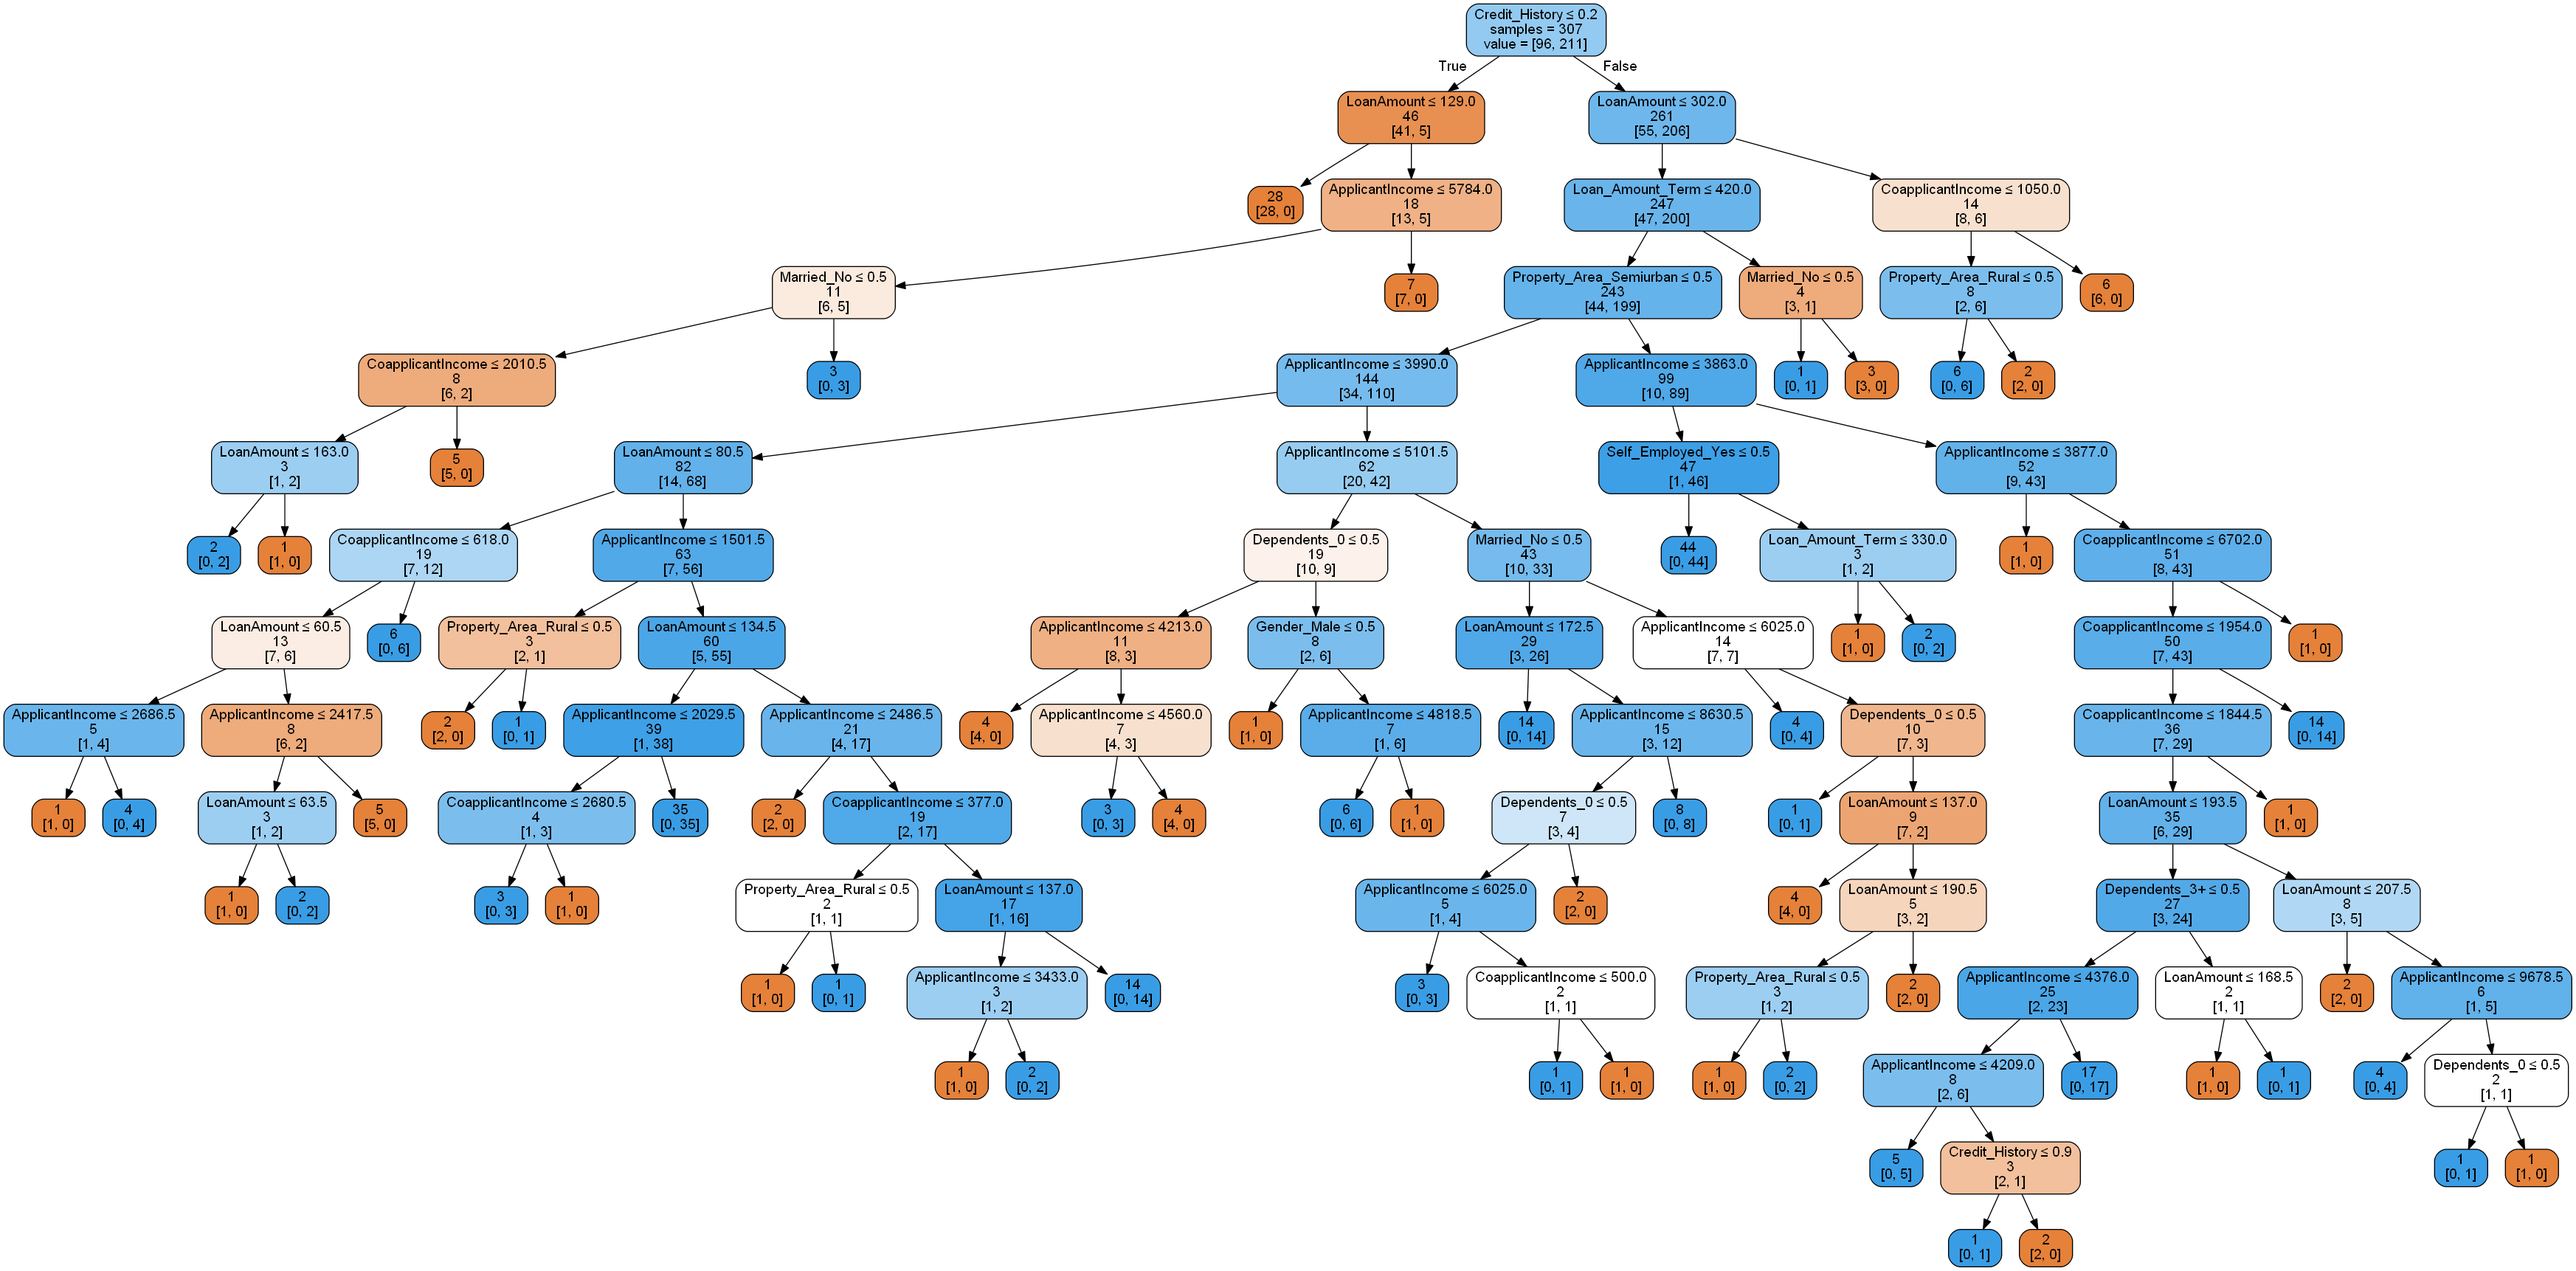

In [59]:
fullClassTree = DecisionTreeClassifier()

fullClassTree.fit(train_X, train_y)

plotDecisionTree(fullClassTree, feature_names=X.columns)

#### First confusion matrix is training; second is for test data

In [60]:
classificationSummary(train_y, fullClassTree.predict(train_X))
print()
classificationSummary(test_y, fullClassTree.predict(test_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0  96   0
     1   0 211

Confusion Matrix (Accuracy 0.6906)

       Prediction
Actual   0   1
     0  51  45
     1  50 161


#### Now we are using hyperparameters to control stopping ( and thereby prevent overfitting); we're setting a max depth, a minimum samples before a node can split, and a minimum impurity decrease before another split is allowed.¶

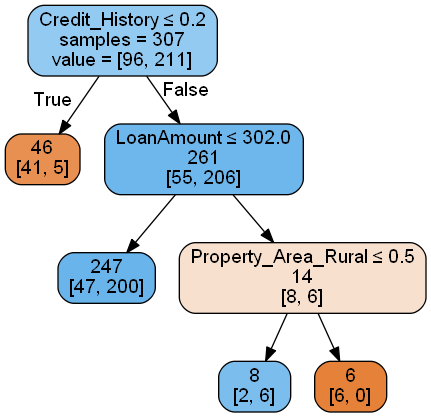

In [61]:
smallClassTree = DecisionTreeClassifier(max_depth=10, min_samples_split=10, min_impurity_decrease=0.01)
smallClassTree.fit(train_X, train_y)

plotDecisionTree(smallClassTree, feature_names=train_X.columns)

In [62]:
classificationSummary(train_y, smallClassTree.predict(train_X))
print()
classificationSummary(test_y, smallClassTree.predict(test_X))

Confusion Matrix (Accuracy 0.8241)

       Prediction
Actual   0   1
     0  47  49
     1   5 206

Confusion Matrix (Accuracy 0.8046)

       Prediction
Actual   0   1
     0  42  54
     1   6 205


### Grid search for Early Stopping

#### Grid search combines cross-validation with hyperparameter searching; grid search works well when you know the ranges of the hyperparameters that you want to check. 

In [63]:
# Start with an initial guess for parameters

param_grid = {
    'max_depth': [10, 20, 30], 
    'min_samples_split': [10, 15, 20], 
    'min_impurity_decrease': [0, 0.0001, 0.001, 0.01],
    'random_state': [1],
}

#### Using a DecisionTreeClassifier with 10-fold CV

In [64]:
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)

gridSearch.fit(train_X, train_y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_impurity_decrease': [0, 0.0001, 0.001, 0.01],
                         'min_samples_split': [10, 15, 20],
                         'random_state': [1]})

In [65]:
print('Initial score: ', gridSearch.best_score_)

print('Initial parameters: ', gridSearch.best_params_)

InitialTree = gridSearch.best_estimator_

Initial score:  0.795268817204301
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.01, 'min_samples_split': 10, 'random_state': 1}


In [66]:
classificationSummary(train_y, InitialTree.predict(train_X))
classificationSummary(test_y, InitialTree.predict(test_X))

Confusion Matrix (Accuracy 0.8241)

       Prediction
Actual   0   1
     0  47  49
     1   5 206
Confusion Matrix (Accuracy 0.8046)

       Prediction
Actual   0   1
     0  42  54
     1   6 205


#### Based on the initial results, we can refine our hyperparameter grid search to look for values around the best estimates.

In [67]:
# Adapt grid based on result from initial grid search

param_grid = {
    'max_depth': list(range(2, 12)), 
    'min_samples_split': list(range(2, 12)), 
    'min_impurity_decrease': [0.009, 0.01, 0.02], 
    'random_state': [1],
}

In [68]:
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)

gridSearch.fit(train_X, train_y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'min_impurity_decrease': [0.009, 0.01, 0.02],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'random_state': [1]})

In [69]:
print('Improved score: ', gridSearch.best_score_)

print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Improved score:  0.8050537634408602
Improved parameters:  {'max_depth': 2, 'min_impurity_decrease': 0.02, 'min_samples_split': 2, 'random_state': 1}


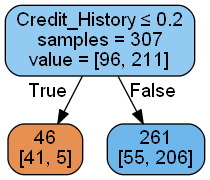

In [70]:
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

In [71]:
classificationSummary(train_y, bestClassTree.predict(train_X))
classificationSummary(test_y, bestClassTree.predict(test_X))

Confusion Matrix (Accuracy 0.8046)

       Prediction
Actual   0   1
     0  41  55
     1   5 206
Confusion Matrix (Accuracy 0.8143)

       Prediction
Actual   0   1
     0  41  55
     1   2 209


## Grid search for Cost-Complexity Pruning

In [72]:

param_grid = {
    'ccp_alpha': [0.001, 0.005, 0.01, 0.15, 0.02, 0.25]
}

In [73]:
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)

gridSearch.fit(train_X, train_y)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.001, 0.005, 0.01, 0.15, 0.02, 0.25]})

In [74]:
print('Cost-Complexity Prune Score: ', gridSearch.best_score_)

print('Best Alpha: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Cost-Complexity Prune Score:  0.8050537634408602
Best Alpha:  {'ccp_alpha': 0.02}


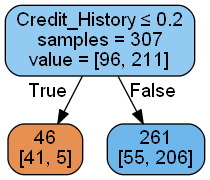

In [75]:
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

In [76]:
classificationSummary(train_y, bestClassTree.predict(train_X))
classificationSummary(test_y, bestClassTree.predict(test_X))

Confusion Matrix (Accuracy 0.8046)

       Prediction
Actual   0   1
     0  41  55
     1   5 206
Confusion Matrix (Accuracy 0.8143)

       Prediction
Actual   0   1
     0  41  55
     1   2 209


## Regression Trees

#### Instead of using a classification voting scheme, regression trees find the mean response value of each completed node.

In [18]:
car_df = pd.read_csv('ToyotaCorolla.csv')

In [19]:
car_df = car_df.rename(columns={'Age_08_04': 'Age', 'Quarterly_Tax': 'Tax'})

# Show the names of the variables after changing two of them



Index(['Id', 'Model', 'Price', 'Age', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Color', 'Automatic', 'CC', 'Doors',
       'Cylinders', 'Gears', 'Tax', 'Weight', 'Mfr_Guarantee',
       'BOVAG_Guarantee', 'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2',
       'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player',
       'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio',
       'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim',
       'Radio_cassette', 'Parking_Assistant', 'Tow_Bar'],
      dtype='object')

In [93]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Id                 1436 non-null   int64 
 1   Model              1436 non-null   object
 2   Price              1436 non-null   int64 
 3   Age                1436 non-null   int64 
 4   Mfg_Month          1436 non-null   int64 
 5   Mfg_Year           1436 non-null   int64 
 6   KM                 1436 non-null   int64 
 7   Fuel_Type          1436 non-null   object
 8   HP                 1436 non-null   int64 
 9   Met_Color          1436 non-null   int64 
 10  Color              1436 non-null   object
 11  Automatic          1436 non-null   int64 
 12  CC                 1436 non-null   int64 
 13  Doors              1436 non-null   int64 
 14  Cylinders          1436 non-null   int64 
 15  Gears              1436 non-null   int64 
 16  Tax                1436 non-null   int64 


In [94]:
X = car_df.drop(columns = ['Price', 'Id', "Mfg_Month", "Age"])

X = pd.get_dummies(X, drop_first=False)

y = car_df['Price']

In [95]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.5, random_state=1)

### Grid search for Early Stopping

#### Grid search combines cross-validation with hyperparameter searching; grid search works well when you know the ranges of the hyperparameters that you want to check. 

In [96]:
# user grid search to find optimized tree; initial search pattern

param_grid = {
    'max_depth': [10, 20, 30], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30], 
    'random_state': [1],
}

In [97]:
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=10)

gridSearch.fit(train_X, train_y)

print('Initial parameters: ', gridSearch.best_params_)

Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 10, 'random_state': 1}


In [98]:
regressionSummary(train_y, gridSearch.predict(train_X))
regressionSummary(test_y, gridSearch.predict(test_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 662.1741
            Mean Absolute Error (MAE) : 498.2489
          Mean Percentage Error (MPE) : -0.4541
Mean Absolute Percentage Error (MAPE) : 4.9636

Regression statistics

                      Mean Error (ME) : 11.1285
       Root Mean Squared Error (RMSE) : 1298.9753
            Mean Absolute Error (MAE) : 993.8848
          Mean Percentage Error (MPE) : -0.8947
Mean Absolute Percentage Error (MAPE) : 10.0968


In [100]:
# refined search grid using parameters from above as guides

param_grid = {
    'max_depth': list(range(3, 12)), 
    'min_impurity_decrease': [0], 
    'min_samples_split': list(range(2, 12)),
    'random_state': [1],
}

In [101]:
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=10)

gridSearch.fit(train_X, train_y)

print('Improved parameters: ', gridSearch.best_params_)

regTree = gridSearch.best_estimator_

Improved parameters:  {'max_depth': 6, 'min_impurity_decrease': 0, 'min_samples_split': 6, 'random_state': 1}


In [102]:
regressionSummary(train_y, gridSearch.predict(train_X))
regressionSummary(test_y, gridSearch.predict(test_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 859.2494
            Mean Absolute Error (MAE) : 648.5261
          Mean Percentage Error (MPE) : -0.7657
Mean Absolute Percentage Error (MAPE) : 6.5386

Regression statistics

                      Mean Error (ME) : 67.0596
       Root Mean Squared Error (RMSE) : 1263.3030
            Mean Absolute Error (MAE) : 974.5853
          Mean Percentage Error (MPE) : -0.3108
Mean Absolute Percentage Error (MAPE) : 9.6867


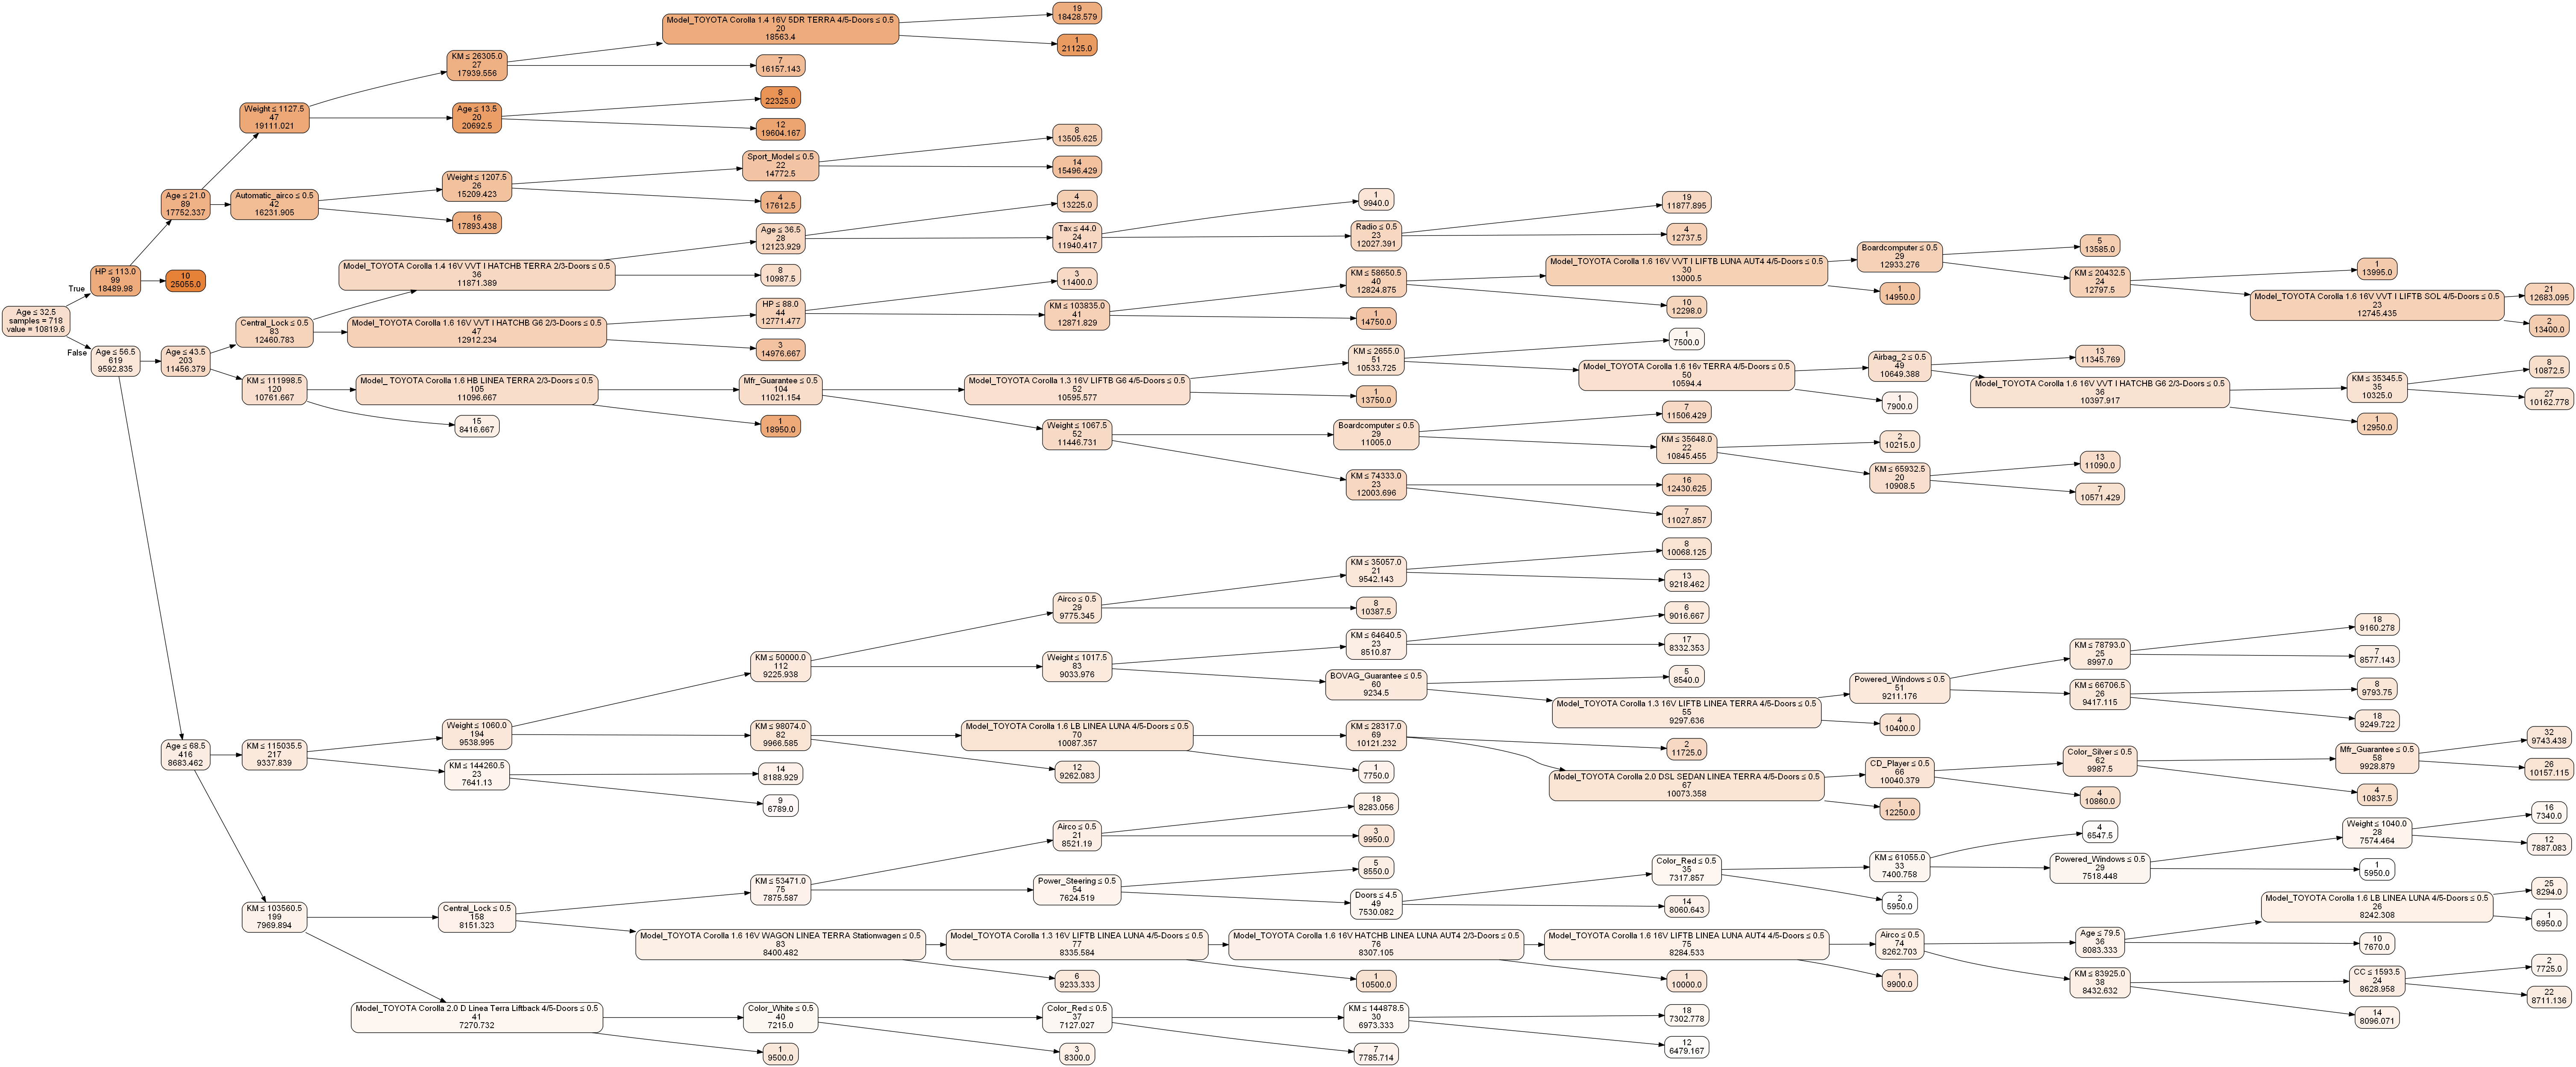

In [45]:
plotDecisionTree(regTree, feature_names=train_X.columns)

# we rotate the plot to fit all elements
plotDecisionTree(regTree, feature_names=train_X.columns, rotate=True)

### Grid search for Cost-Complexity Pruning

In [103]:
param_grid = {
    'ccp_alpha': [0.001, 0.005, 0.01, 0.015, 0.02]
}

In [104]:
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=10)

gridSearch.fit(train_X, train_y)

C:\Users\dgugg\Anaconda3\envs\PythonAnalytics\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.001, 0.005, 0.01, 0.015, 0.02]})

In [105]:
print('Cost-Complexity Prune Score: ', gridSearch.best_score_)

print('Best Alpha: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Cost-Complexity Prune Score:  0.10586854460093895
Best Alpha:  {'ccp_alpha': 0.005}


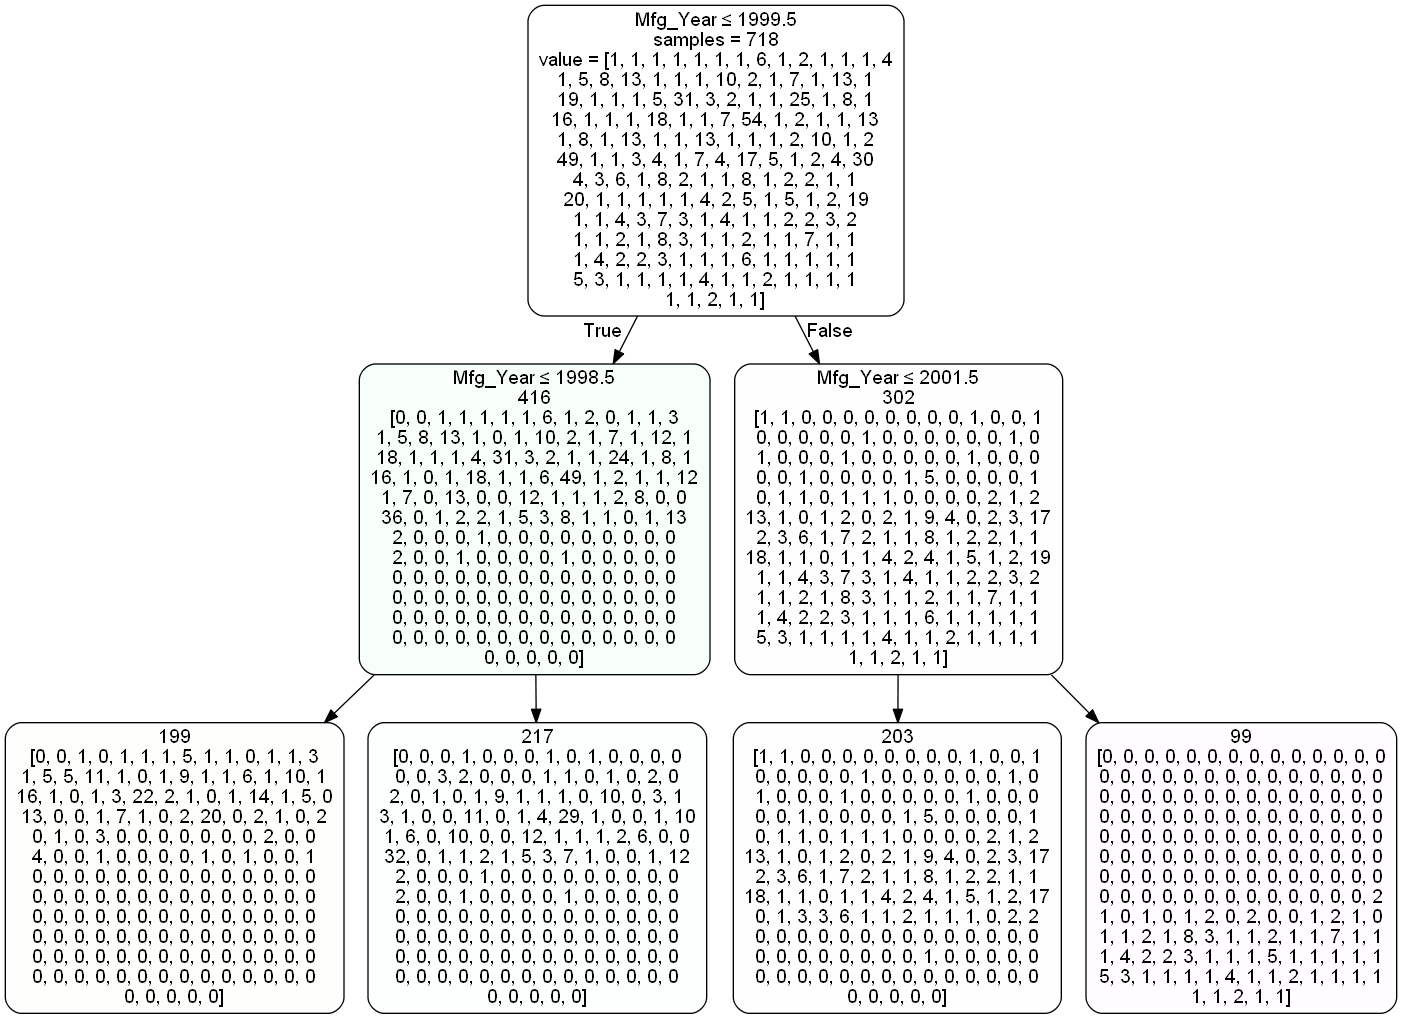

In [106]:
plotDecisionTree(bestClassTree, feature_names=train_X.columns)

In [107]:
regressionSummary(train_y, gridSearch.predict(train_X))
regressionSummary(test_y, gridSearch.predict(test_X))


Regression statistics

                      Mean Error (ME) : 31.1602
       Root Mean Squared Error (RMSE) : 2053.4840
            Mean Absolute Error (MAE) : 1298.2214
          Mean Percentage Error (MPE) : -3.4022
Mean Absolute Percentage Error (MAPE) : 11.9478

Regression statistics

                      Mean Error (ME) : -93.4666
       Root Mean Squared Error (RMSE) : 1766.4720
            Mean Absolute Error (MAE) : 1226.5975
          Mean Percentage Error (MPE) : -4.2171
Mean Absolute Percentage Error (MAPE) : 12.0964
